In [163]:
# Importing all Libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [164]:
# Loading the dataset in a dataframe using python
df = pd.read_csv("auto_mpg.csv",names=["mpg","cylinders","displacement","horsepower","weight","acceleration",
                                      "model year","origin","car name"],header=0)

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [165]:
# shape of the data
df.shape

(397, 9)

In [166]:
# columns inside the dataset
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [167]:
# printing data types of columns 
df.dtypes 

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

Numerical Variables: 'mpg', 'displacement', 'horsepower', 'weight' and 'acceleration'. Note: "horsepower" is continous variable which is wrongly taken as discrete variable

Catergorical Variables: 'cylinders', 'model year', 'origin', 'car name'.

In [168]:
#Changed datatype to continuous.
df['horsepower']=pd.to_numeric(df['horsepower'],errors='coerce')

In [169]:
#'car name' does not make any difference to a car's milage. Therefore we drop the column
df.drop("car name", axis= 1, inplace= True)

In [170]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,15.0,8,350.0,165.0,3693,11.5,70,1
1,18.0,8,318.0,150.0,3436,11.0,70,1
2,16.0,8,304.0,150.0,3433,12.0,70,1
3,17.0,8,302.0,140.0,3449,10.5,70,1
4,15.0,8,429.0,198.0,4341,10.0,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1
393,44.0,4,97.0,52.0,2130,24.6,82,2
394,32.0,4,135.0,84.0,2295,11.6,82,1
395,28.0,4,120.0,79.0,2625,18.6,82,1


In [171]:
#  our data types changed now 
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    391 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   model year    397 non-null    int64  
 7   origin        397 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 24.9 KB


In [173]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

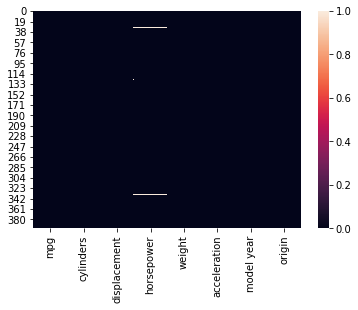

In [174]:
sns.heatmap(df.isnull())

 Above 3 codes suggests that only horsepower column are having null values which we will impute with the mean value 

# Summary Statistics

In [175]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,397.000000,397.000000,397.000000,391.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,104.404092,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,38.518732,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [176]:
dfcor = df.corr()

dfcor

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775412,-0.803972,-0.778165,-0.831558,0.419133,0.578667,0.562894
cylinders,-0.775412,1.000000,0.950718,0.843315,0.896623,-0.503016,-0.344729,-0.561796
displacement,-0.803972,0.950718,1.000000,0.897265,0.932957,-0.542083,-0.367470,-0.608749
horsepower,-0.778165,0.843315,0.897265,1.000000,0.864397,-0.688857,-0.415239,-0.454509
weight,-0.831558,0.896623,0.932957,0.864397,1.000000,-0.416488,-0.305150,-0.580552
acceleration,0.419133,-0.503016,-0.542083,-0.688857,-0.416488,1.000000,0.284376,0.204102
model year,0.578667,-0.344729,-0.367470,-0.415239,-0.305150,0.284376,1.000000,0.178441
origin,0.562894,-0.561796,-0.608749,-0.454509,-0.580552,0.204102,0.178441,1.000000


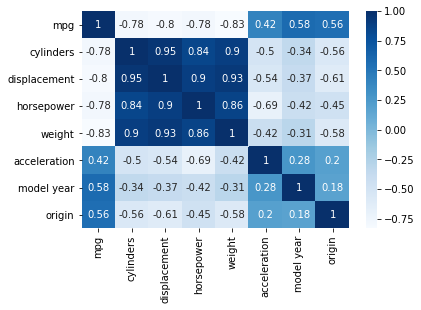

In [177]:
sns.heatmap(dfcor,cmap="Blues",annot=True)

Numerical valriables are well correlated with the target variable "mpg". But, there is multi-collinearity between the features.

# Exploratory Data Analysis

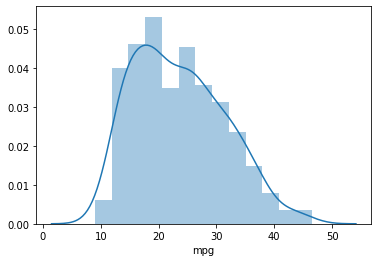

In [178]:
 #Slight positive skewness.
sns.distplot(df["mpg"])

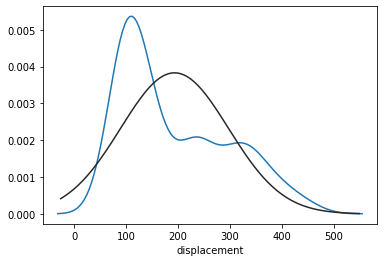

In [179]:
from scipy import stats
sns.distplot(df["displacement"],fit= stats.norm, hist=False)

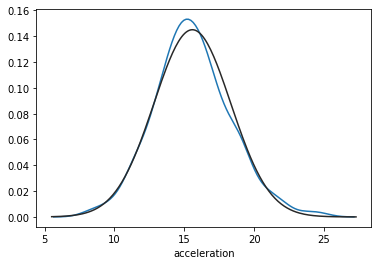

In [180]:
sns.distplot(df["acceleration"],fit= stats.norm, hist=False)

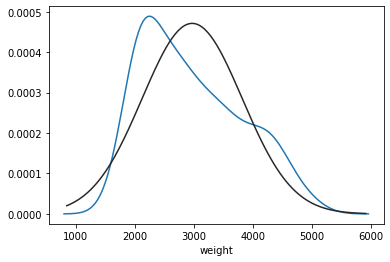

In [181]:
sns.distplot(df["weight"], fit= stats.norm, hist=False)

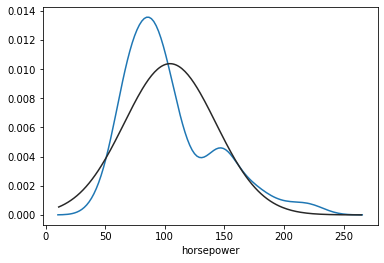

In [182]:
sns.distplot(df["horsepower"], fit= stats.norm, hist=False)

Horsepower, displacement, weight are right skewed.Whereas, acceleration is normally distributed.

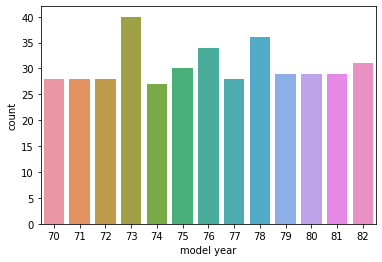

In [183]:
sns.countplot(df["model year"])

More number of car models were available during 1973 and 1978.

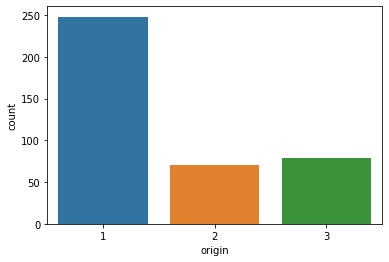

In [184]:
sns.countplot(df["origin"])

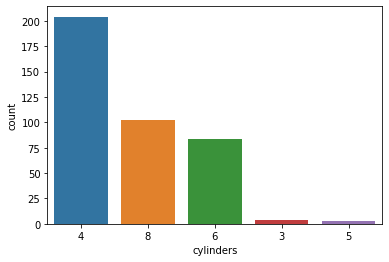

In [185]:
sns.countplot(df["cylinders"], order= df['cylinders'].value_counts().index)

More number of car are manufactured with four cylinders and milage for it is the highest of any cylinder.

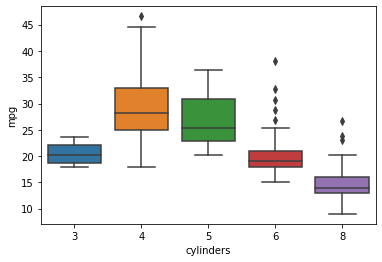

In [186]:
sns.boxplot(df["cylinders"],df["mpg"])

We can obseve that as the number of cylinders increase, there is decrease in the milage.

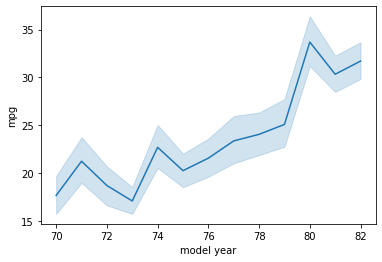

In [187]:
sns.lineplot(data= df, x="model year",y="mpg")


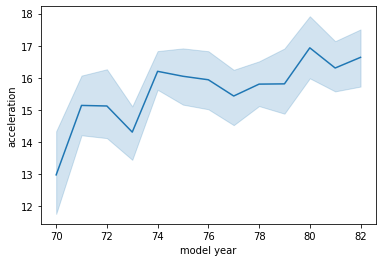

In [188]:
sns.lineplot(data= df, x="model year",y="acceleration")

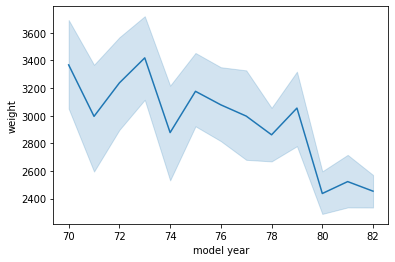

In [189]:
sns.lineplot(data= df, x="model year",y="weight")

 *From the lineplots, there is a sudden spike in the average milage, acceleration and decrease in the body weight in the year 1980, indicating shift in the auto-technology.

*There is a steady increase in the milage every year

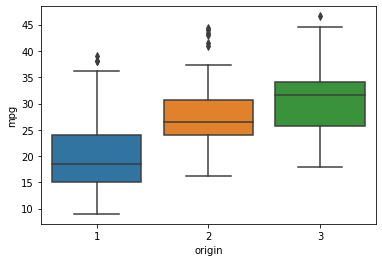

In [190]:
sns.boxplot(x="origin",y="mpg",data=df)

Country belonging to origin 1  was the least compared to the rest and that belonging to origin 3 had the highest milage.

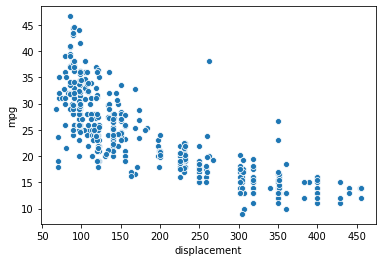

In [191]:
sns.scatterplot( x="displacement",y="mpg",data=df)

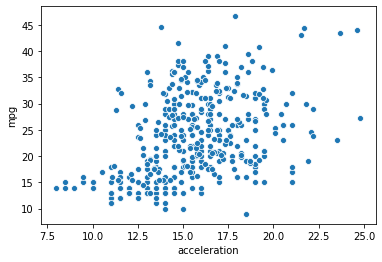

In [192]:
sns.scatterplot(x="acceleration",y="mpg",data=df)

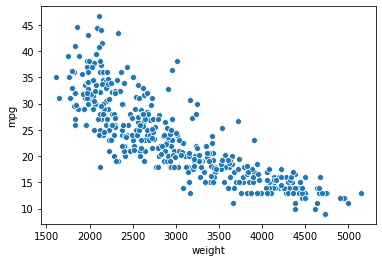

In [193]:
sns.scatterplot(x="weight",y="mpg",data=df)

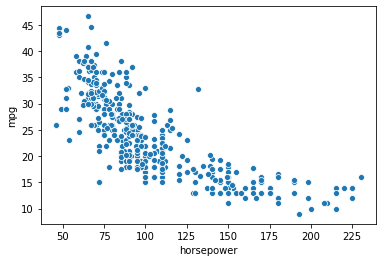

In [194]:
sns.scatterplot(x="horsepower",y="mpg",data=df)

Milage has a strong negative correlation with displacement, weight and horsepower.

Acceleration has slight positive correlation

mpg                AxesSubplot(0.125,0.657941;0.227941x0.222059)
cylinders       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
displacement    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
horsepower         AxesSubplot(0.125,0.391471;0.227941x0.222059)
weight          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
acceleration    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
model year            AxesSubplot(0.125,0.125;0.227941x0.222059)
origin             AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

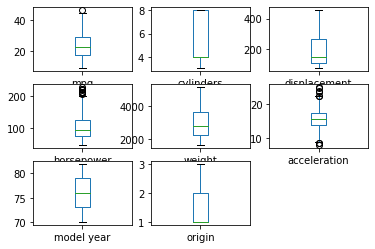

In [195]:
df.plot(kind='box',subplots=True,layout=(3,3))

In [196]:
df.skew()

mpg             0.452893
cylinders       0.533598
displacement    0.726982
horsepower      1.092151
weight          0.535347
acceleration    0.275880
model year      0.010233
origin          0.919911
dtype: float64

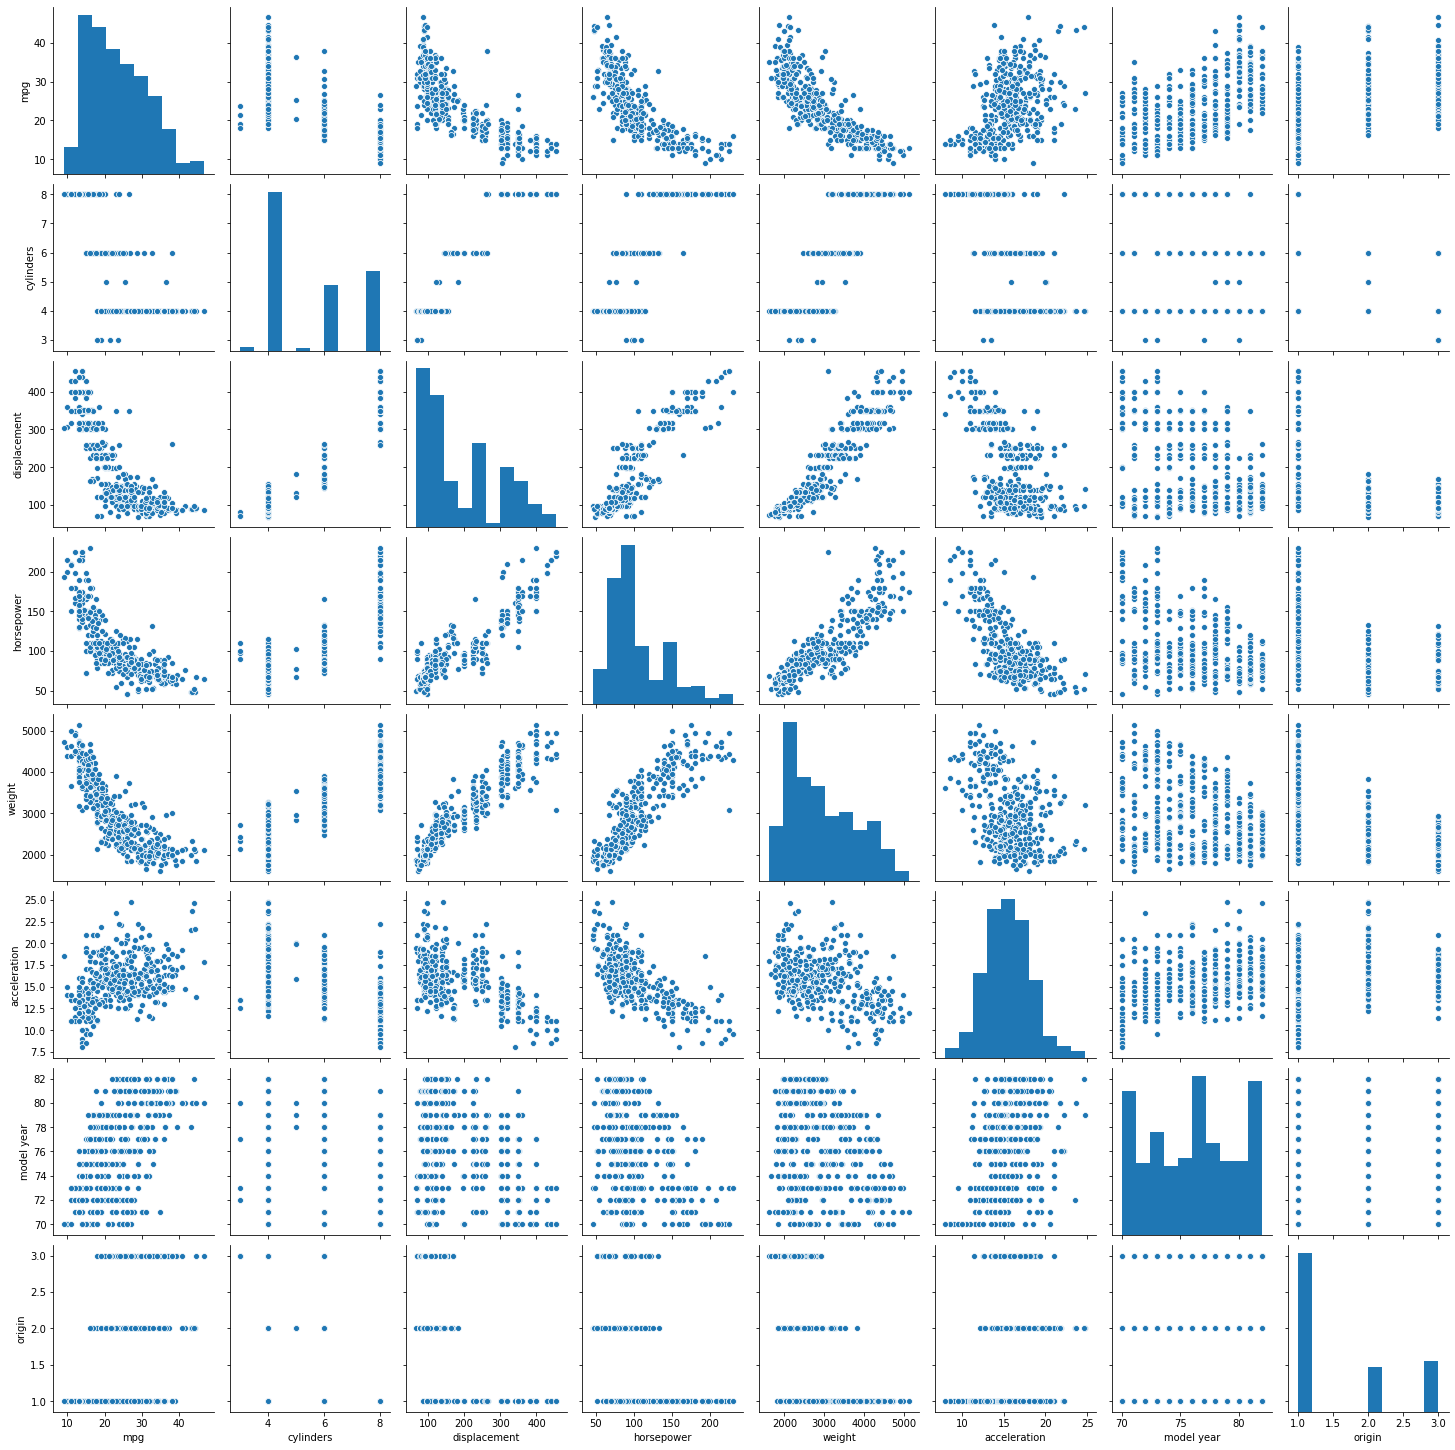

In [197]:
sns.pairplot(df)

In [198]:
# imputing the missing values of numerical data type with the mean value
from sklearn.impute import SimpleImputer

imp= SimpleImputer(strategy="mean")

df["horsepower"]=imp.fit_transform(df["horsepower"].values.reshape(-1,1))

In [199]:
# now no null values left in our data set 
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [200]:
#Splitting the dependent and independent variables here
x = df.drop("mpg",axis=1)

y = df["mpg"]

In [201]:
print(x.shape)
print(y.shape)

(397, 7)
(397,)


In [202]:
#scaling the input variables
from sklearn.preprocessing import StandardScaler
scale =StandardScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(data=x)

In [203]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)

In [204]:
# defining a common function here for all Regression model and there by finding the best random state having highest r2 score

regr  = LinearRegression()
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state,"is",max_r_score)
    return final_r_state

In [205]:
# Using LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.8208609182969255
r2 score corresponding to 43 is 0.8061351159604062
r2 score corresponding to 44 is 0.8113489051268548
r2 score corresponding to 45 is 0.8027688637268262
r2 score corresponding to 46 is 0.8348712911488552
r2 score corresponding to 47 is 0.803580125023396
r2 score corresponding to 48 is 0.8075486505547687
r2 score corresponding to 49 is 0.8355880627078526
r2 score corresponding to 50 is 0.7723387942641465
r2 score corresponding to 51 is 0.8273453201583756
r2 score corresponding to 52 is 0.7793981880642119
r2 score corresponding to 53 is 0.8026396431766142
r2 score corresponding to 54 is 0.7615011116595607
r2 score corresponding to 55 is 0.7816239802266732
r2 score corresponding to 56 is 0.8230086798927644
r2 score corresponding to 57 is 0.8246036150338337
r2 score corresponding to 58 is 0.8708390400097394
r2 score corresponding to 59 is 0.7964710720218035
r2 score corresponding to 60 is 0.7822429537776431
r2 score corresponding to 61 is 

In [206]:
## Using GridSearchCV to find out the best parameters of the KNeighborsRegressor model
neighbors = {"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 5}

In [207]:
# Using the best parameter obtained above finding out the best random sate of KNeighborsRegressor having highest r2 sco
knr=KNeighborsRegressor(n_neighbors=5)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.7963906433517911
r2 score corresponding to 43 is 0.8274056042854842
r2 score corresponding to 44 is 0.8737864259266639
r2 score corresponding to 45 is 0.8299879914030561
r2 score corresponding to 46 is 0.8969927886485258
r2 score corresponding to 47 is 0.8647940539849333
r2 score corresponding to 48 is 0.8844088146376291
r2 score corresponding to 49 is 0.8839409586683332
r2 score corresponding to 50 is 0.7676023763691615
r2 score corresponding to 51 is 0.883237586122133
r2 score corresponding to 52 is 0.8529078837219038
r2 score corresponding to 53 is 0.86486667665614
r2 score corresponding to 54 is 0.8186495060704303
r2 score corresponding to 55 is 0.8477675016438113
r2 score corresponding to 56 is 0.8601434221888667
r2 score corresponding to 57 is 0.891163837857038
r2 score corresponding to 58 is 0.9061736987244772
r2 score corresponding to 59 is 0.8520161238535056
r2 score corresponding to 60 is 0.8704003308439583
r2 score corresponding to 61 is 0.8

In [208]:
# Lets chaeck the mean r2 score of both Linear regression model and knn  regression
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

#Based on below output KNN Regression is performing well

Mean r2 score for Linear Regression:  0.5986323481005608
standard deviation in r2 score for Linear Regression:  0.20487237652620918

Mean r2 score for KNN Regression:  0.6824980600460943
standard deviation in r2 score for KNN Regression:  0.25236823870749064


In [209]:
## Using GridSearchCV to find out the best parameters of the Support vector regressor model
parameters={"kernel":["linear","rbf","poly"],"C":[1,10]}
svr = SVR()
clf=GridSearchCV(svr,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [210]:
svr=SVR(kernel="rbf",C=10)
r_state=maxr2_score(svr,x,y)

r2 score corresponding to 42 is 0.8361415596101028
r2 score corresponding to 43 is 0.8427984315685473
r2 score corresponding to 44 is 0.896696740579226
r2 score corresponding to 45 is 0.8804068068639916
r2 score corresponding to 46 is 0.9088023229012573
r2 score corresponding to 47 is 0.8752429931927881
r2 score corresponding to 48 is 0.8995913078470119
r2 score corresponding to 49 is 0.9061329719923606
r2 score corresponding to 50 is 0.8240663903405816
r2 score corresponding to 51 is 0.8953232740794497
r2 score corresponding to 52 is 0.8504858289171765
r2 score corresponding to 53 is 0.8522537680944304
r2 score corresponding to 54 is 0.8547008271073459
r2 score corresponding to 55 is 0.841612491430415
r2 score corresponding to 56 is 0.8929975342017279
r2 score corresponding to 57 is 0.9126918192747068
r2 score corresponding to 58 is 0.9179327934972372
r2 score corresponding to 59 is 0.8531437415373806
r2 score corresponding to 60 is 0.8798599597398363
r2 score corresponding to 61 is 0

In [211]:
#Lets check Lasso regression and find best value of alpha
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [212]:
#Lets check max r2 score when we use Lasso
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.8205439987195803
r2 score corresponding to 43 is 0.8062435894315672
r2 score corresponding to 44 is 0.8113990434046523
r2 score corresponding to 45 is 0.8029187339001675
r2 score corresponding to 46 is 0.8348003114394119
r2 score corresponding to 47 is 0.8035688749138487
r2 score corresponding to 48 is 0.8074938354307366
r2 score corresponding to 49 is 0.8356272232490409
r2 score corresponding to 50 is 0.7723552419904199
r2 score corresponding to 51 is 0.8274144912355413
r2 score corresponding to 52 is 0.7794305766585691
r2 score corresponding to 53 is 0.8025503443539812
r2 score corresponding to 54 is 0.7613766994655384
r2 score corresponding to 55 is 0.7817232951612254
r2 score corresponding to 56 is 0.8233910567285108
r2 score corresponding to 57 is 0.8245459551332205
r2 score corresponding to 58 is 0.8708797321505453
r2 score corresponding to 59 is 0.7962872117855552
r2 score corresponding to 60 is 0.7827743041405663
r2 score corresponding to 61 is

In [213]:
print("Mean r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.5984626087279091
standard deviation in r2 score for Lasso Regression:  0.20532515702222695


In [214]:
#Lets check Ridge regression and find best value of alpha
rdreg =Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(rdreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [215]:
#Lets check max r2 score when we use Ridge with best paramtere value =1 obtained using GridSearchCV
rdreg=Ridge(alpha=0.001)
r_state=maxr2_score(rdreg,x,y)

r2 score corresponding to 42 is 0.82085975849721
r2 score corresponding to 43 is 0.8061372376485876
r2 score corresponding to 44 is 0.8113498439407757
r2 score corresponding to 45 is 0.8027710538579578
r2 score corresponding to 46 is 0.8348701565174762
r2 score corresponding to 47 is 0.8035797573872117
r2 score corresponding to 48 is 0.8075479396864111
r2 score corresponding to 49 is 0.8355874690927002
r2 score corresponding to 50 is 0.7723381522406069
r2 score corresponding to 51 is 0.8273463079209208
r2 score corresponding to 52 is 0.7793970236155152
r2 score corresponding to 53 is 0.8026387368701047
r2 score corresponding to 54 is 0.7615002042840842
r2 score corresponding to 55 is 0.7816238405807925
r2 score corresponding to 56 is 0.8230137770609368
r2 score corresponding to 57 is 0.8246038443450104
r2 score corresponding to 58 is 0.870840199892281
r2 score corresponding to 59 is 0.7964700351143514
r2 score corresponding to 60 is 0.7822484821398867
r2 score corresponding to 61 is 0.

In [216]:
# to check whether our result gets boosted or not
from sklearn.ensemble import RandomForestRegressor

In [217]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=75,test_size=0.20)
rf=RandomForestRegressor(n_estimators=200,random_state=75)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [218]:
rfscore=rf.score(x_train,y_train)
print(rfscore*100)

98.14843982553315


In [219]:
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is: 2.3445171184595717
r2_score is: 0.9055695977162296


RandomForestRegressor outperformed LinearRegression model,KNeighborsRegressor,SVR model,Lasso,Ridge with a  r2 score of 90.55 and 
root mean square error 2.34 only

In [220]:
from sklearn.externals import joblib

In [221]:
#Save the model as a pickle in a file
joblib.dump(rf,"rfmpg.pkl")

['rfmpg.pkl']

In [222]:
model=joblib.load("rfmpg.pkl")

In [223]:
model.predict(x_test)

array([28.337 , 15.4835, 17.6875, 24.5465, 19.0605, 21.418 , 14.296 ,
       28.19  , 28.7685, 18.9405, 24.079 , 34.639 , 20.339 , 13.3625,
       13.01  , 37.218 , 14.701 , 16.2945, 19.5345, 28.158 , 19.2645,
       14.655 , 12.18  , 23.744 , 19.6235, 35.652 , 23.6825, 12.88  ,
       25.3645, 25.783 , 19.902 , 32.9905, 18.062 , 18.058 , 16.6855,
       15.345 , 36.037 , 19.2745, 19.6375, 28.587 , 18.7605, 19.5805,
       16.434 , 15.046 , 22.6115, 26.43  , 26.5145, 35.206 , 28.6865,
       19.2095, 30.744 , 25.646 , 33.4925, 25.956 , 31.95  , 23.1325,
       23.0475, 16.0205, 32.2135, 22.573 , 20.5565, 20.464 , 17.66  ,
       38.1245, 14.277 , 30.9805, 31.195 , 31.0075, 20.4345, 29.2615,
       30.839 , 34.266 , 34.9185, 14.835 , 20.9925, 22.207 , 28.7255,
       22.925 , 12.055 , 18.1115])

In [224]:
print(y_test)

18     26.0
72     13.0
46     19.0
170    24.0
285    17.6
       ... 
273    20.3
195    24.5
271    23.8
43     13.0
191    22.0
Name: mpg, Length: 80, dtype: float64
